In [50]:
import pandas as pd
import numpy as np

path = r"/home/anle/Analysis_CO2_Emission_Prj/Merge_Data/final.csv"
df = pd.read_csv(path)

In [51]:
df.shape

(6474, 23)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6474 non-null   int64  
 1   country                                 6474 non-null   object 
 2   iso_code                                6474 non-null   object 
 3   year                                    6474 non-null   int64  
 4   ft_co2                                  5160 non-null   float64
 5   ft_hdi                                  4484 non-null   float64
 6   ft_industr_on_gdp                       4660 non-null   float64
 7   ft_deforest_area_ha                     4636 non-null   float64
 8   ft_tax                                  396 non-null    float64
 9   ft_forest_area_percent                  4830 non-null   float64
 10  ft_forest_area_sqkm                     4830 non-null   floa

In [53]:
df= df[df["year"]<=2020]
df= df[ df["year"]>=2000]

In [54]:
df

,Unnamed: 0,country,iso_code,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_tax,ft_forest_area_percent,...,ft_nonelectriccarsales,ft_globalclimatephysicalriskindexgcpri,ft_cri,ft_fossil_fuel,ft_government_expenditure_on_education,ft_environmental_protection,ft_area_ha,ft_deforestation,ft_gdp,ft_renewable_energy
0,0,Aruba,ABW,2000,2.378,NaN,13.175955,NaN,NaN,2.333333,...,NaN,16.952972,NaN,NaN,21.807710,NaN,NaN,NaN,1.873453e+09,0.2
1,1,Aruba,ABW,2001,2.407,NaN,13.054069,NaN,NaN,2.333333,...,NaN,18.187546,NaN,NaN,21.323180,NaN,NaN,NaN,1.896457e+09,0.2
2,2,Aruba,ABW,2002,2.437,NaN,13.241621,0.526108,NaN,2.333333,...,NaN,16.045400,NaN,NaN,19.757150,NaN,NaN,NaN,1.961844e+09,0.2
3,3,Aruba,ABW,2003,2.561,NaN,14.892210,0.977058,NaN,2.333333,...,NaN,16.457343,NaN,NaN,NaN,NaN,NaN,NaN,2.044112e+09,0.2
4,4,Aruba,ABW,2004,2.616,NaN,15.596508,NaN,NaN,2.333333,...,NaN,13.058301,NaN,NaN,14.902910,NaN,NaN,NaN,2.254831e+09,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6464,6464,Zimbabwe,ZWE,2016,10.581,0.570,22.114973,10925.901170,NaN,45.570273,...,NaN,12.945077,NaN,47.58,23.527084,NaN,39004305.0,24982.0,2.054876e+10,81.7
6465,6465,Zimbabwe,ZWE,2017,9.827,0.575,32.015584,25913.690270,NaN,45.451183,...,NaN,7.578984,NaN,44.75,19.691229,NaN,39004305.0,67262.0,5.107473e+10,82.0
6466,6466,Zimbabwe,ZWE,2018,11.205,0.586,31.037911,6541.812114,NaN,45.332093,...,NaN,3.969643,NaN,47.19,19.158785,NaN,39004305.0,21827.0,3.415606e+10,79.7
6467,6467,Zimbabwe,ZWE,2019,10.263,0.584,32.025943,11514.478630,NaN,45.213002,...,NaN,5.673413,NaN,46.10,10.463589,NaN,39004305.0,26689.0,2.571566e+10,81.0


In [55]:
df.shape

(5229, 23)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5229 entries, 0 to 6468
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              5229 non-null   int64  
 1   country                                 5229 non-null   object 
 2   iso_code                                5229 non-null   object 
 3   year                                    5229 non-null   int64  
 4   ft_co2                                  4515 non-null   float64
 5   ft_hdi                                  3907 non-null   float64
 6   ft_industr_on_gdp                       4083 non-null   float64
 7   ft_deforest_area_ha                     3881 non-null   float64
 8   ft_tax                                  257 non-null    float64
 9   ft_forest_area_percent                  4404 non-null   float64
 10  ft_forest_area_sqkm                     4404 non-null   float64
 

In [57]:
df_process = df.copy()

In [58]:
df_process = df_process.drop_duplicates()
df_process = df_process.dropna(how='all')

In [59]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5229 entries, 0 to 6468
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              5229 non-null   int64  
 1   country                                 5229 non-null   object 
 2   iso_code                                5229 non-null   object 
 3   year                                    5229 non-null   int64  
 4   ft_co2                                  4515 non-null   float64
 5   ft_hdi                                  3907 non-null   float64
 6   ft_industr_on_gdp                       4083 non-null   float64
 7   ft_deforest_area_ha                     3881 non-null   float64
 8   ft_tax                                  257 non-null    float64
 9   ft_forest_area_percent                  4404 non-null   float64
 10  ft_forest_area_sqkm                     4404 non-null   float64
 

In [60]:
df_cal_missing = df_process.isnull().sum().reset_index()
df_cal_missing.columns = ["column", "missing"]
total_row = len(df_process)
df_cal_missing['percentage'] = df_cal_missing["missing"]*100/total_row

In [61]:
df_cal_missing

,column,missing,percentage
0,Unnamed: 0,0,0.000000
1,country,0,0.000000
2,iso_code,0,0.000000
3,year,0,0.000000
4,ft_co2,714,13.654618
5,ft_hdi,1322,25.282081
6,ft_industr_on_gdp,1146,21.916236
7,ft_deforest_area_ha,1348,25.779308
8,ft_tax,4972,95.085102
9,ft_forest_area_percent,825,15.777395


Drop column has # missing >40%

In [62]:

df_drop_column = df_cal_missing[df_cal_missing["percentage"]>=40]
list_drop_column = df_drop_column["column"].tolist()
df_low_missing= df_cal_missing[df_cal_missing["percentage"]<40]

In [63]:
list_drop_column

['ft_tax',
 'ft_electriccarssold',
 'ft_nonelectriccarsales',
 'ft_cri',
 'ft_fossil_fuel',
 'ft_government_expenditure_on_education',
 'ft_environmental_protection']

In [64]:
df_process = df_process.drop(columns=list_drop_column)

In [65]:
df_process = df_process.dropna(subset='ft_co2')


In [66]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4515 entries, 0 to 6468
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              4515 non-null   int64  
 1   country                                 4515 non-null   object 
 2   iso_code                                4515 non-null   object 
 3   year                                    4515 non-null   int64  
 4   ft_co2                                  4515 non-null   float64
 5   ft_hdi                                  3886 non-null   float64
 6   ft_industr_on_gdp                       4021 non-null   float64
 7   ft_deforest_area_ha                     3608 non-null   float64
 8   ft_forest_area_percent                  4184 non-null   float64
 9   ft_forest_area_sqkm                     4184 non-null   float64
 10  ft_population                           4284 non-null   float64
 

In [67]:
df_process.describe()

,Unnamed: 0,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_forest_area_sqkm,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_area_ha,ft_deforestation,ft_gdp,ft_renewable_energy
count,4515.000000,4515.000000,4515.000000,3886.000000,4021.000000,3.608000e+03,4184.000000,4.184000e+03,4.284000e+03,3479.000000,3.140000e+03,3.140000e+03,4.202000e+03,4253.000000
mean,3243.069767,2010.000000,145.486423,0.695641,26.067748,1.139269e+05,32.285927,2.048461e+05,3.420886e+07,14.714910,8.254931e+07,1.521930e+05,3.155976e+11,31.023348
std,1881.968671,6.055971,707.283275,0.160182,12.412799,4.462803e+05,24.329206,7.755170e+05,1.321618e+08,7.400737,2.063622e+08,5.546873e+05,1.382495e+12,29.622223
min,0.000000,2000.000000,0.000000,0.266000,3.150196,0.000000e+00,0.000000,0.000000e+00,9.544000e+03,0.000000,1.026700e+04,0.000000e+00,1.396473e+07,0.000000
25%,1575.500000,2005.000000,0.963500,0.572250,18.061523,1.884049e+02,11.046003,2.618425e+03,1.207729e+06,10.224460,6.984453e+06,1.335000e+03,4.411999e+09,5.600000
50%,3260.000000,2010.000000,7.489000,0.718000,24.089979,5.508632e+03,30.854579,2.395513e+04,6.624426e+06,14.397485,2.394740e+07,1.461900e+04,1.852667e+10,20.600000
75%,4892.500000,2015.000000,55.551000,0.822000,30.969854,4.712567e+04,50.540827,1.141350e+05,2.244459e+07,18.264753,6.335309e+07,7.111150e+04,1.279918e+11,51.800000
max,6468.000000,2020.000000,10905.693000,0.969000,86.669555,5.560432e+06,95.577213,8.153120e+06,1.411100e+09,68.372508,1.689455e+09,8.217252e+06,2.154000e+13,98.300000


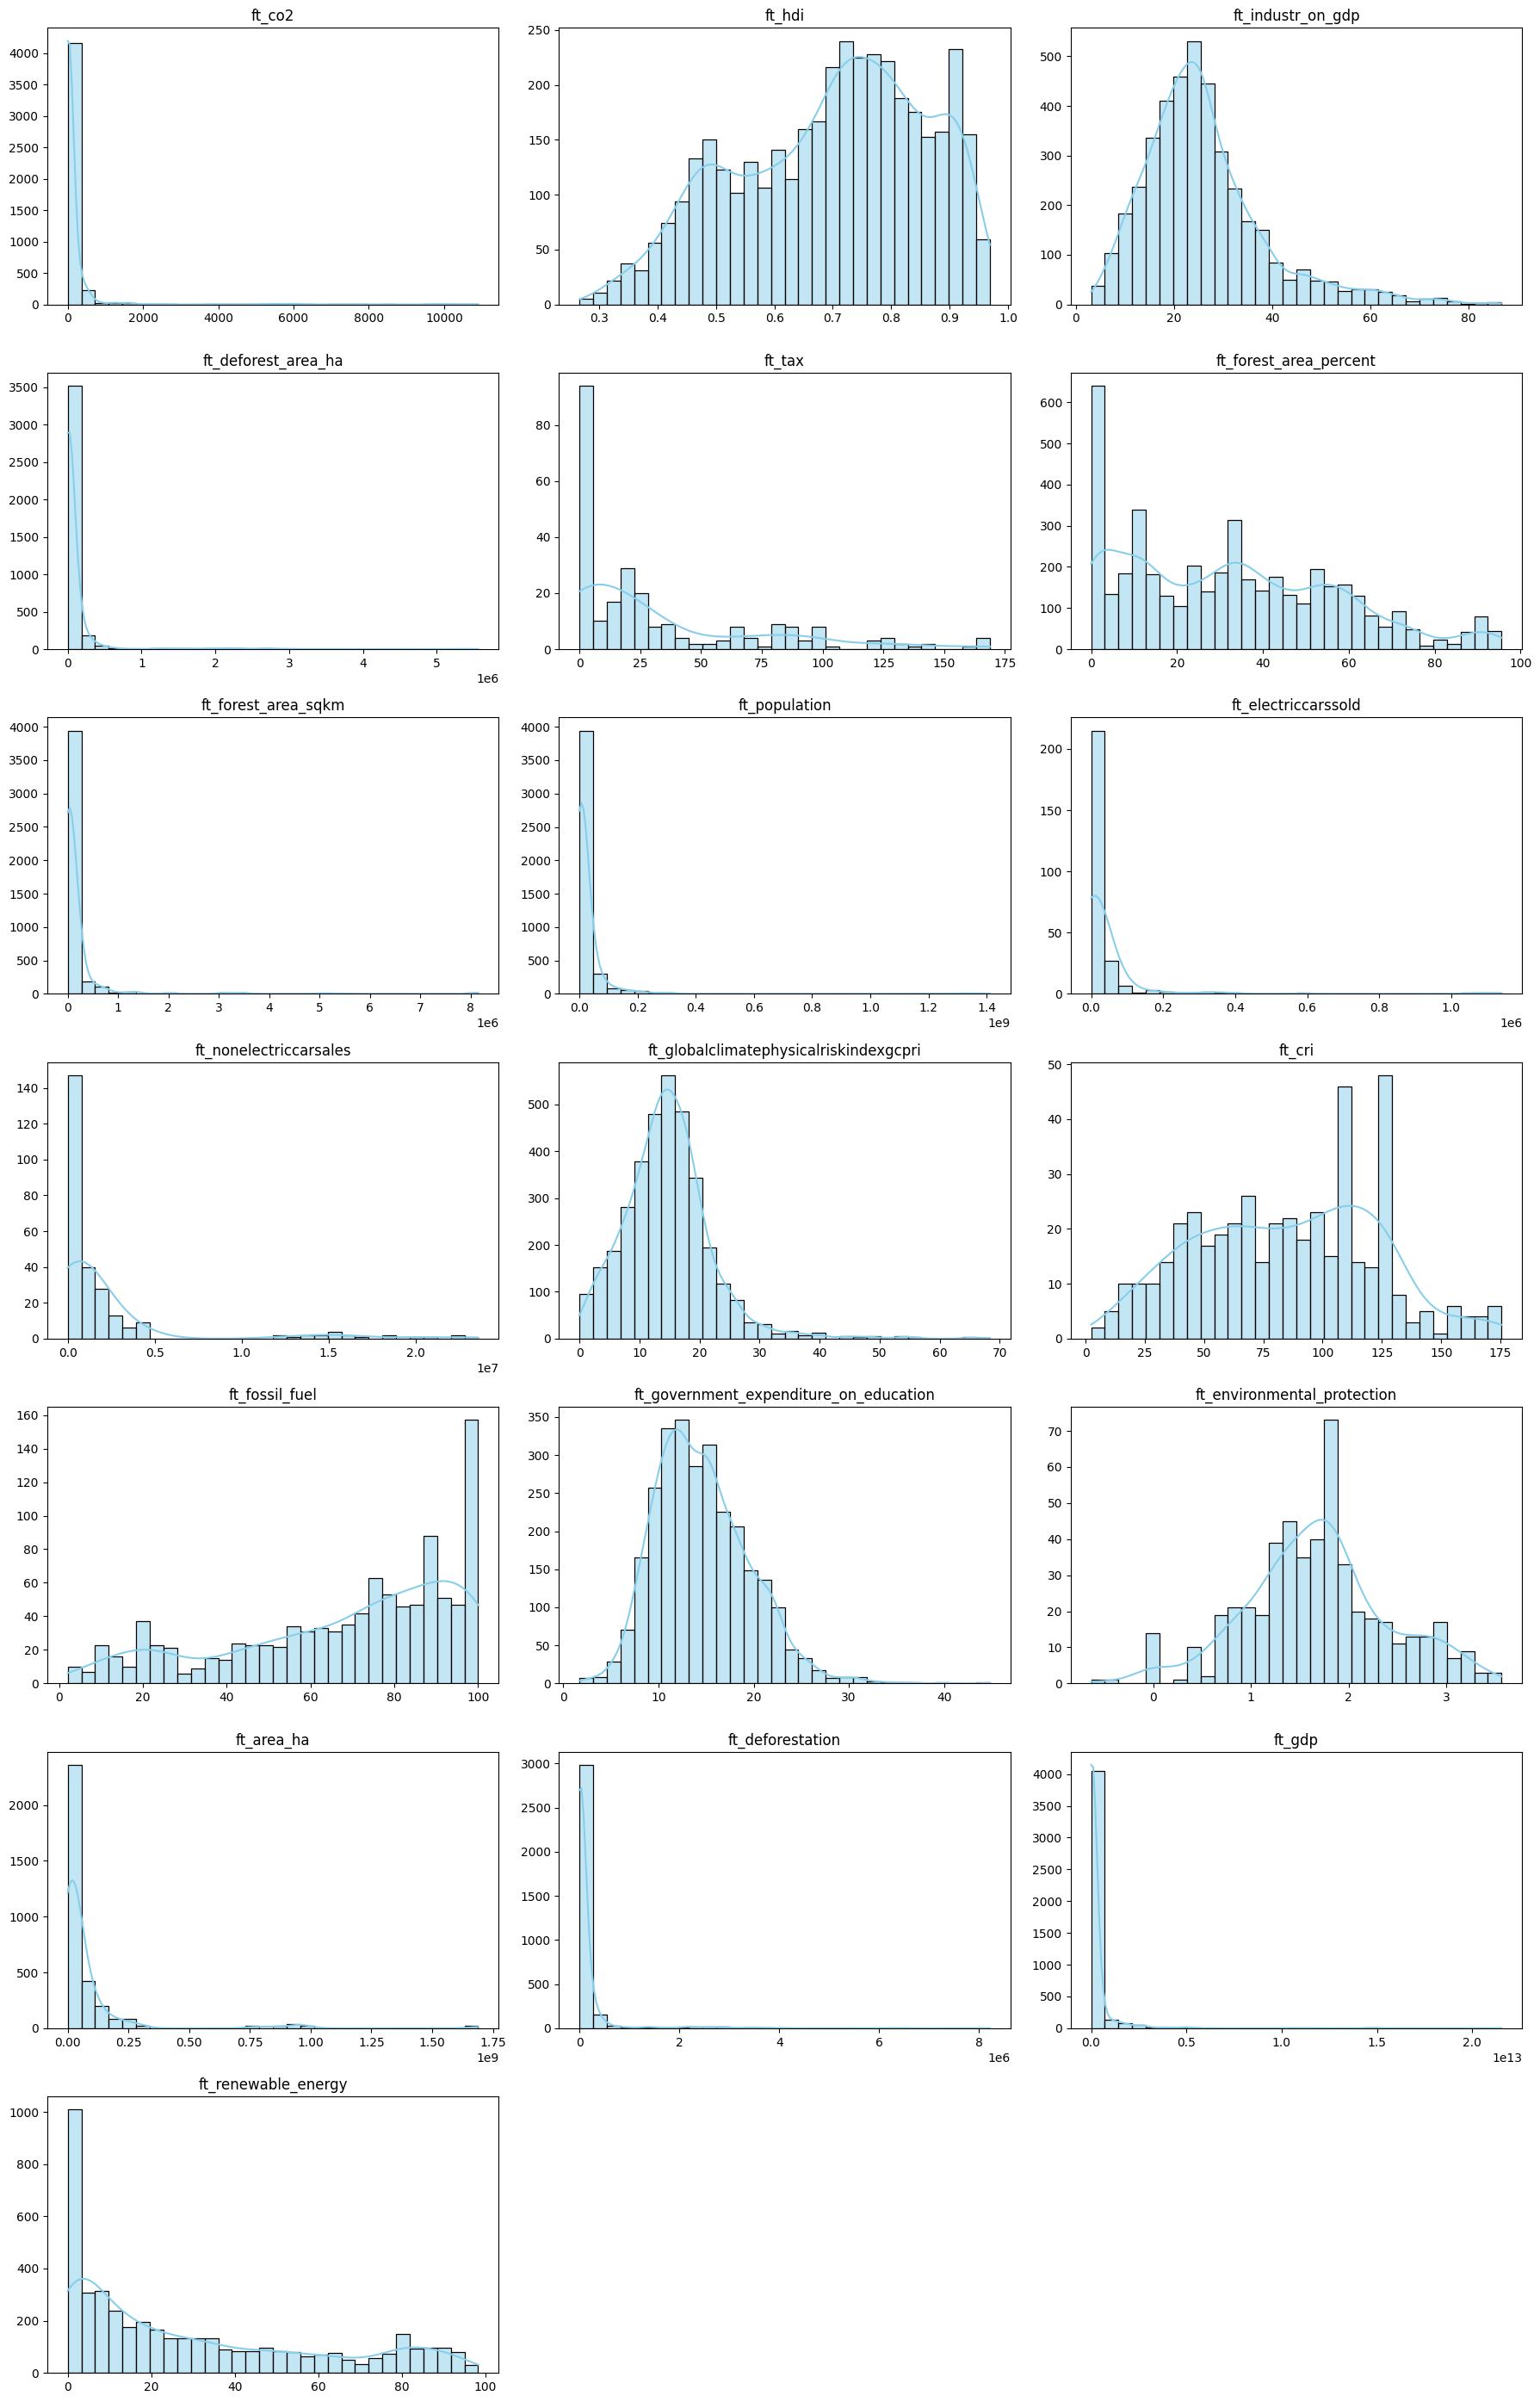

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named df
# Select only columns with prefix 'ft_'
ft_columns = [col for col in df.columns if col.startswith("ft_")]

# Set up subplots (3 columns per row for readability)
n_cols = 3
n_rows = (len(ft_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(ft_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [69]:
# Count missing values per row
df_process["missing_count"] = df_process.isnull().sum(axis=1)

# Optional: show summary statistics of missing counts
print(df_process["missing_count"].describe())

# Optional: view rows with most missing values
df_process_sorted = df_process.sort_values("missing_count", ascending=False)
df_process_sorted.head(10)


count    4515.000000
mean        1.613289
std         2.647794
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        11.000000
Name: missing_count, dtype: float64


,Unnamed: 0,country,iso_code,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_forest_area_sqkm,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_area_ha,ft_deforestation,ft_gdp,ft_renewable_energy,missing_count
93,93,Anguilla,AIA,2015,0.139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6332,6332,Wallis and Futuna,WLF,2014,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6333,6333,Wallis and Futuna,WLF,2015,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6334,6334,Wallis and Futuna,WLF,2016,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6335,6335,Wallis and Futuna,WLF,2017,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6336,6336,Wallis and Futuna,WLF,2018,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
3978,3978,Montserrat,MSR,2000,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6337,6337,Wallis and Futuna,WLF,2019,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6338,6338,Wallis and Futuna,WLF,2020,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5108,5108,"Saint Helena, Ascension and Tristan da Cunha",SHN,2012,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


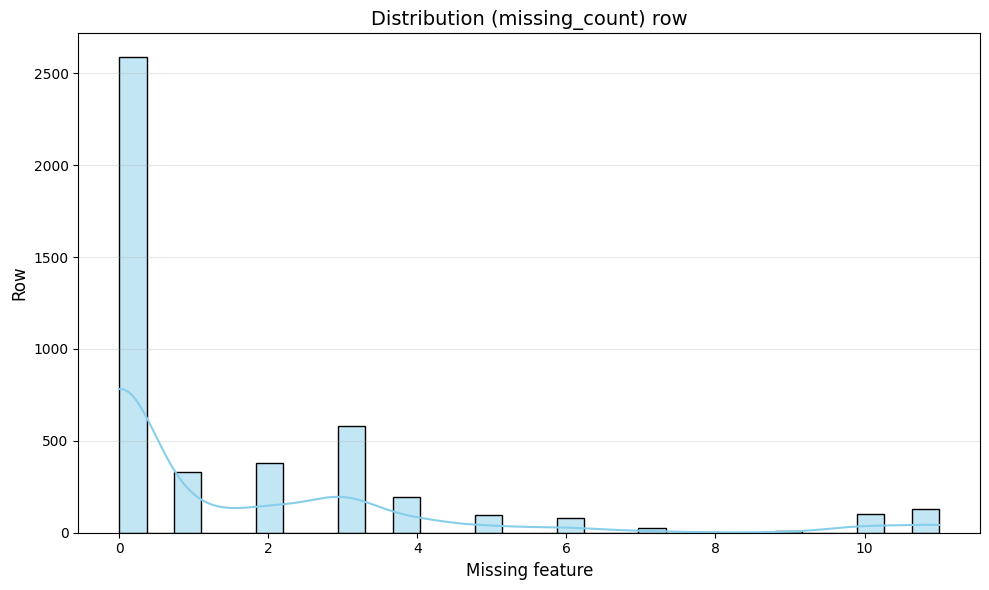

In [70]:

# Vẽ phân bố của số lượng giá trị thiếu trên mỗi hàng
plt.figure(figsize=(10, 6))
sns.histplot(df_process["missing_count"], bins=30, kde=True, color="skyblue")

plt.title("Distribution (missing_count) row", fontsize=14)
plt.xlabel("Missing feature", fontsize=12)
plt.ylabel("Row", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


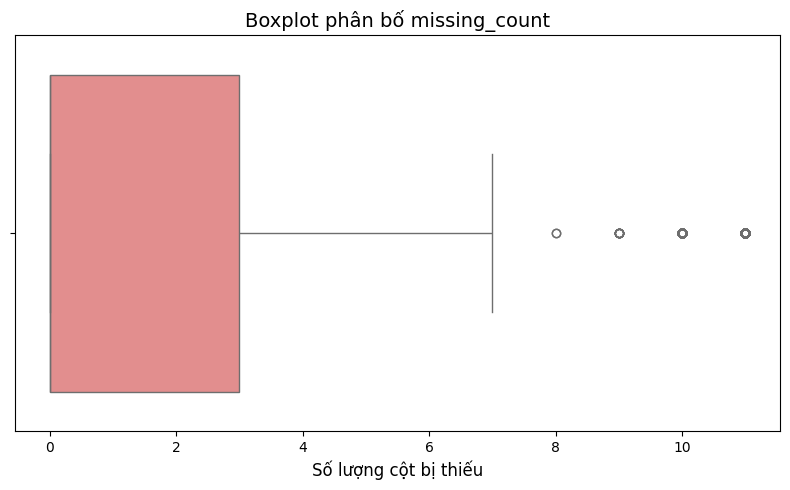

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_process["missing_count"], color="lightcoral")

plt.title("Boxplot phân bố missing_count", fontsize=14)
plt.xlabel("Số lượng cột bị thiếu", fontsize=12)
plt.tight_layout()
plt.show()

In [72]:
# Tính toán IQR
Q1 = df_process["missing_count"].quantile(0.25)
Q3 = df_process["missing_count"].quantile(0.75)
IQR = Q3 - Q1

# Giới hạn dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc bỏ outliers
df_no_outlier = df_process[
    (df_process["missing_count"] >= lower_bound) &
    (df_process["missing_count"] <= upper_bound)
]

print(f"Số dòng ban đầu: {len(df_process)}")
print(f"Số dòng sau khi loại outlier: {len(df_no_outlier)}")


Số dòng ban đầu: 4515
Số dòng sau khi loại outlier: 4272


In [73]:
df_process_cut_missing_data_country_row = df_process[df_process["missing_count"] <= 4]

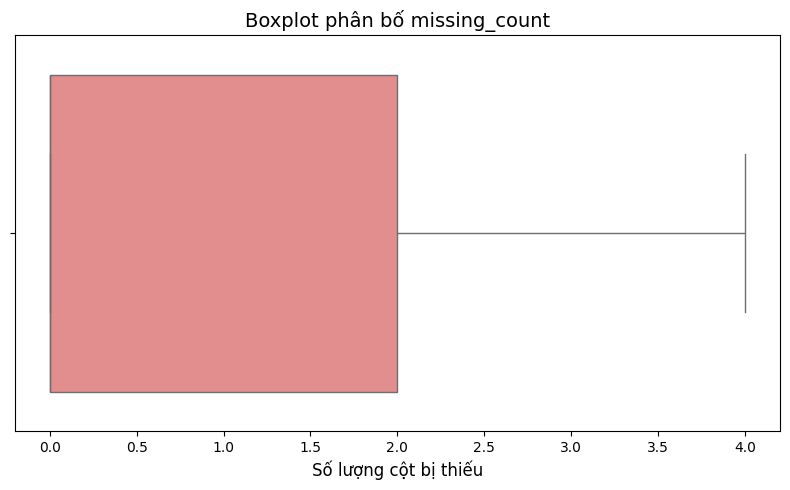

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_process_cut_missing_data_country_row["missing_count"], color="lightcoral")

plt.title("Boxplot phân bố missing_count", fontsize=14)
plt.xlabel("Số lượng cột bị thiếu", fontsize=12)
plt.tight_layout()
plt.show()

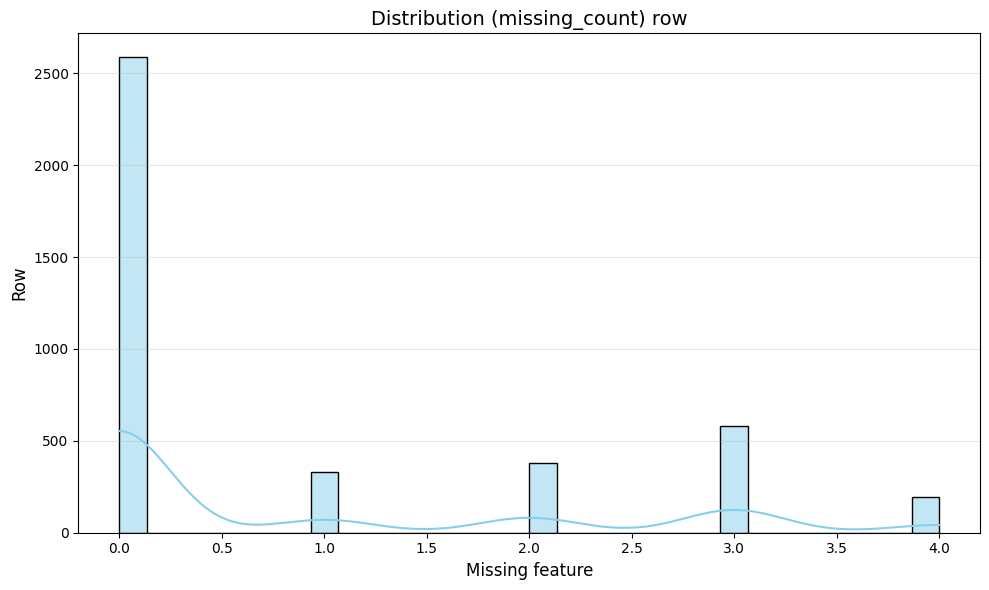

In [75]:

# Vẽ phân bố của số lượng giá trị thiếu trên mỗi hàng
plt.figure(figsize=(10, 6))
sns.histplot(df_process_cut_missing_data_country_row["missing_count"], bins=30, kde=True, color="skyblue")

plt.title("Distribution (missing_count) row", fontsize=14)
plt.xlabel("Missing feature", fontsize=12)
plt.ylabel("Row", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [76]:
df_process_cut_missing_data_country_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 6468
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              4073 non-null   int64  
 1   country                                 4073 non-null   object 
 2   iso_code                                4073 non-null   object 
 3   year                                    4073 non-null   int64  
 4   ft_co2                                  4073 non-null   float64
 5   ft_hdi                                  3841 non-null   float64
 6   ft_industr_on_gdp                       3888 non-null   float64
 7   ft_deforest_area_ha                     3475 non-null   float64
 8   ft_forest_area_percent                  4052 non-null   float64
 9   ft_forest_area_sqkm                     4052 non-null   float64
 10  ft_population                           4073 non-null   float64
 

<Axes: >

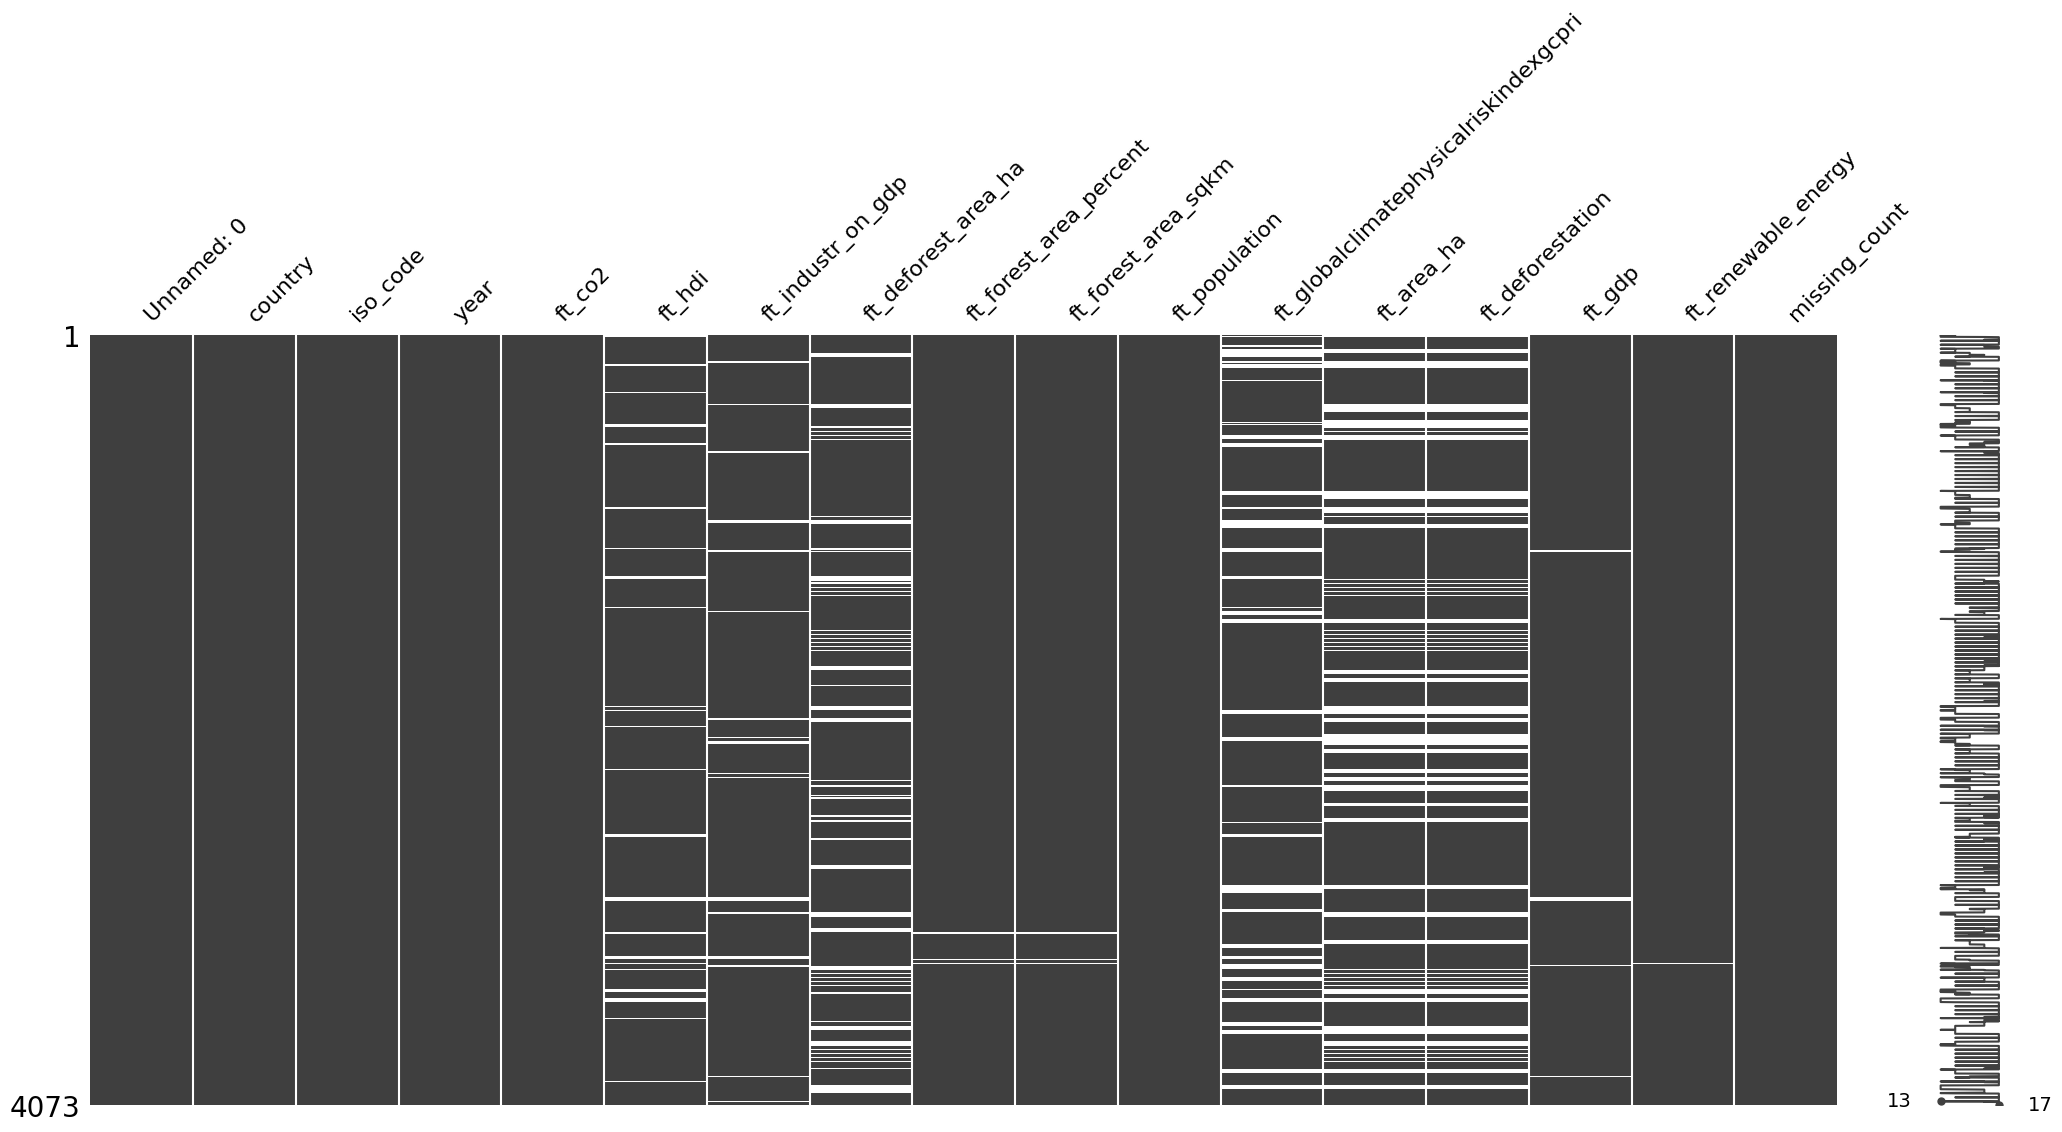

In [77]:
import missingno as msno
msno.matrix(df_process_cut_missing_data_country_row)

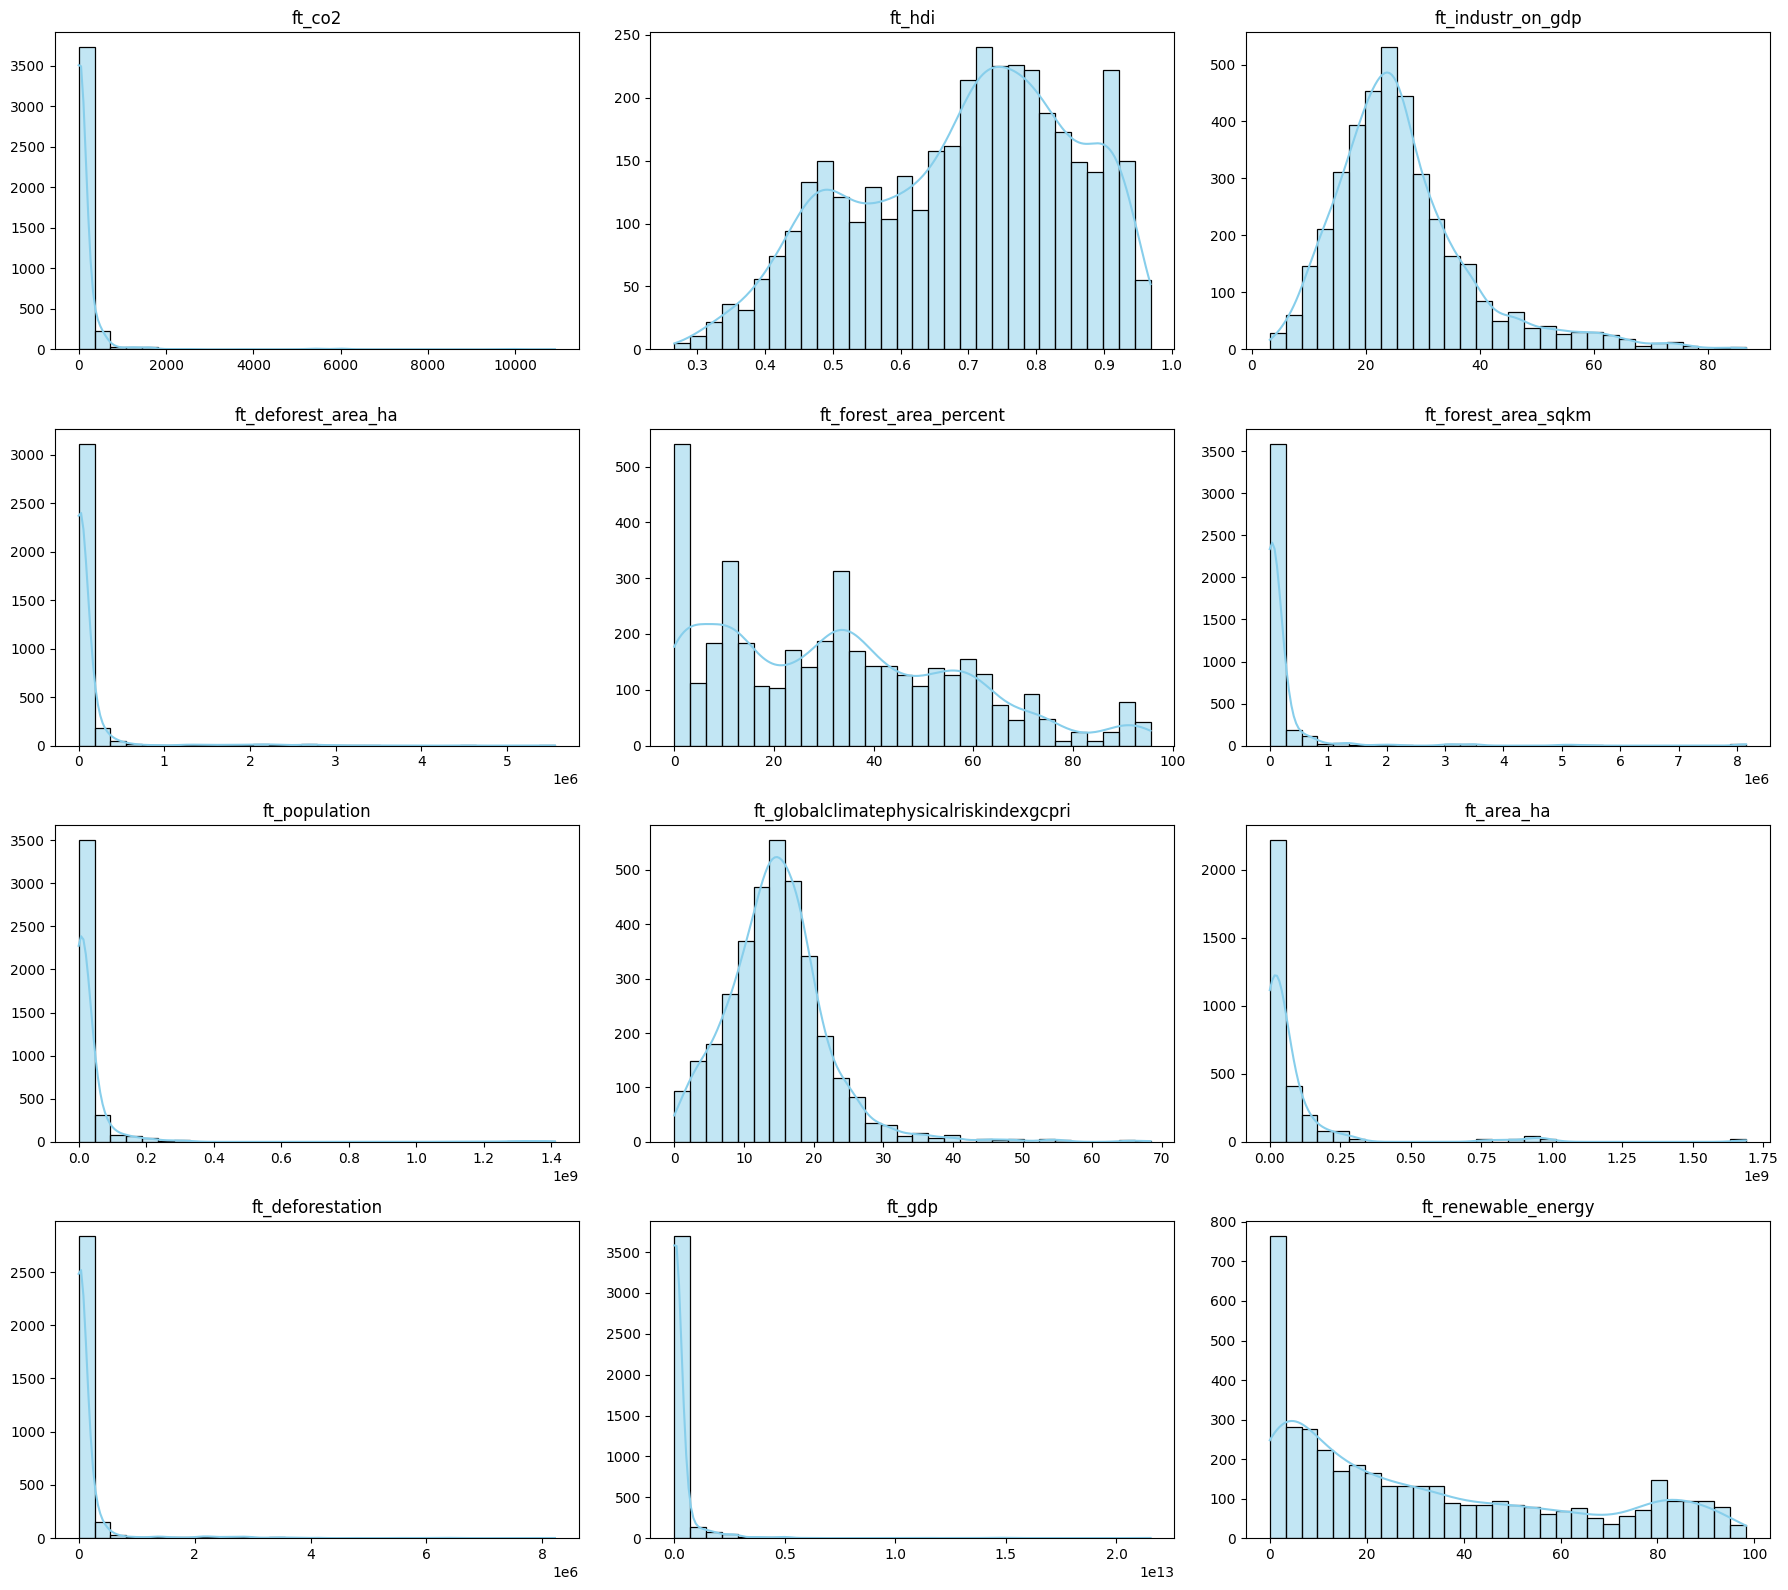

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named df
# Select only columns with prefix 'ft_'
ft_columns = [col for col in df_process_cut_missing_data_country_row.columns if col.startswith("ft_")]

# Set up subplots (3 columns per row for readability)
n_cols = 3
n_rows = (len(ft_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(ft_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_process_cut_missing_data_country_row[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [79]:
def fill_with_mode(series):
    mode_val = series.mode()
    if not mode_val.empty:
        return series.fillna(mode_val[0])
    else:
        return series

# Áp dụng theo từng iso_code
df_process_cut_missing_data_country_row["ft_area_ha"] = (
    df_process_cut_missing_data_country_row
    .groupby("iso_code")["ft_area_ha"]
    .transform(fill_with_mode)
)

/tmp/ipykernel_2758/1462399266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process_cut_missing_data_country_row["ft_area_ha"] = (


In [80]:
df_na_area_ha = df_process_cut_missing_data_country_row[df_process_cut_missing_data_country_row["ft_area_ha"].isna()]

In [81]:
na_area_ha_list = df_na_area_ha["country"].drop_duplicates().tolist()

In [82]:
na_area_ha_list

['Aruba',
 'Andorra',
 'Armenia',
 'Antigua and Barbuda',
 'Bahrain',
 'Bahamas',
 'Belize',
 'Bermuda',
 'Barbados',
 'Comoros',
 'Cabo Verde',
 'Curaçao',
 'Cyprus',
 'Dominica',
 'Grenada',
 'Israel',
 'Jamaica',
 'Kiribati',
 'Saint Kitts and Nevis',
 'Kuwait',
 'Libya',
 'Saint Lucia',
 'Liechtenstein',
 'Lesotho',
 'Moldova, Republic of',
 'Maldives',
 'Marshall Islands',
 'North Macedonia',
 'Montenegro',
 'Mauritius',
 'Palau',
 'Qatar',
 'Singapore',
 'Sint Maarten (Dutch part)',
 'Seychelles',
 'Turks and Caicos Islands',
 'Tonga',
 'Trinidad and Tobago',
 'Tuvalu',
 'Saint Vincent and the Grenadines',
 'Samoa']

In [83]:

# List of countries and area (hectares)
data_area = [
  {"country":"Aruba","area_ha":18000},
  {"country":"Andorra","area_ha":46800},
  {"country":"Armenia","area_ha":2974300},
  {"country":"Antigua and Barbuda","area_ha":44260},
  {"country":"Bahrain","area_ha":76000},
  {"country":"Bahamas","area_ha":1393900},
  {"country":"Belize","area_ha":2296600},
  {"country":"Bermuda","area_ha":5400},
  {"country":"Barbados","area_ha":43000},
  {"country":"Comoros","area_ha":223500},
  {"country":"Cabo Verde","area_ha":403300},
  {"country":"Curaçao","area_ha":44400},
  {"country":"Cyprus","area_ha":925100},
  {"country":"Dominica","area_ha":75100},
  {"country":"Grenada","area_ha":34400},
  {"country":"Israel","area_ha":2077000},
  {"country":"Jamaica","area_ha":1099100},
  {"country":"Kiribati","area_ha":81100},
  {"country":"Saint Kitts and Nevis","area_ha":26100},
  {"country":"Kuwait","area_ha":1781800},
  {"country":"Libya","area_ha":175954000},
  {"country":"Saint Lucia","area_ha":61600},
  {"country":"Liechtenstein","area_ha":16000},
  {"country":"Lesotho","area_ha":3035500},
  {"country":"Moldova, Republic of","area_ha":3385100},
  {"country":"Maldives","area_ha":29800},
  {"country":"Marshall Islands","area_ha":18100},
  {"country":"North Macedonia","area_ha":2571300},
  {"country":"Montenegro","area_ha":1381200},
  {"country":"Mauritius","area_ha":204000},
  {"country":"Palau","area_ha":45900},
  {"country":"Qatar","area_ha":1158600},
  {"country":"Singapore","area_ha":69700},
  {"country":"Sint Maarten (Dutch part)","area_ha":5440},
  {"country":"Seychelles","area_ha":45500},
  {"country":"Turks and Caicos Islands","area_ha":94800},
  {"country":"Tonga","area_ha":74700},
  {"country":"Trinidad and Tobago","area_ha":512800},
  {"country":"Tuvalu","area_ha":2600},
  {"country":"Saint Vincent and the Grenadines","area_ha":38900},
  {"country":"Samoa","area_ha":283100}
]

df_area = pd.DataFrame(data_area)
# Merge theo tên quốc gia
df_merged = df_process_cut_missing_data_country_row.merge(
    df_area, on="country", how="left"
)

# Điền giá trị thiếu bằng area_ha từ bảng df_area
df_merged["ft_area_ha"] = df_merged["ft_area_ha"].fillna(df_merged["area_ha"])

# Xoá cột tạm nếu muốn
df_merged.drop(columns=["area_ha"], inplace=True)


In [84]:
df_merged.isnull().sum()

Unnamed: 0                                  0
country                                     0
iso_code                                    0
year                                        0
ft_co2                                      0
ft_hdi                                    232
ft_industr_on_gdp                         185
ft_deforest_area_ha                       598
ft_forest_area_percent                     21
ft_forest_area_sqkm                        21
ft_population                               0
ft_globalclimatephysicalriskindexgcpri    632
ft_area_ha                                  0
ft_deforestation                          940
ft_gdp                                     42
ft_renewable_energy                         5
missing_count                               0
dtype: int64

In [85]:
df_merged = df_merged.drop(columns='ft_deforestation')

In [86]:
df_merged.isnull().sum()

Unnamed: 0                                  0
country                                     0
iso_code                                    0
year                                        0
ft_co2                                      0
ft_hdi                                    232
ft_industr_on_gdp                         185
ft_deforest_area_ha                       598
ft_forest_area_percent                     21
ft_forest_area_sqkm                        21
ft_population                               0
ft_globalclimatephysicalriskindexgcpri    632
ft_area_ha                                  0
ft_gdp                                     42
ft_renewable_energy                         5
missing_count                               0
dtype: int64

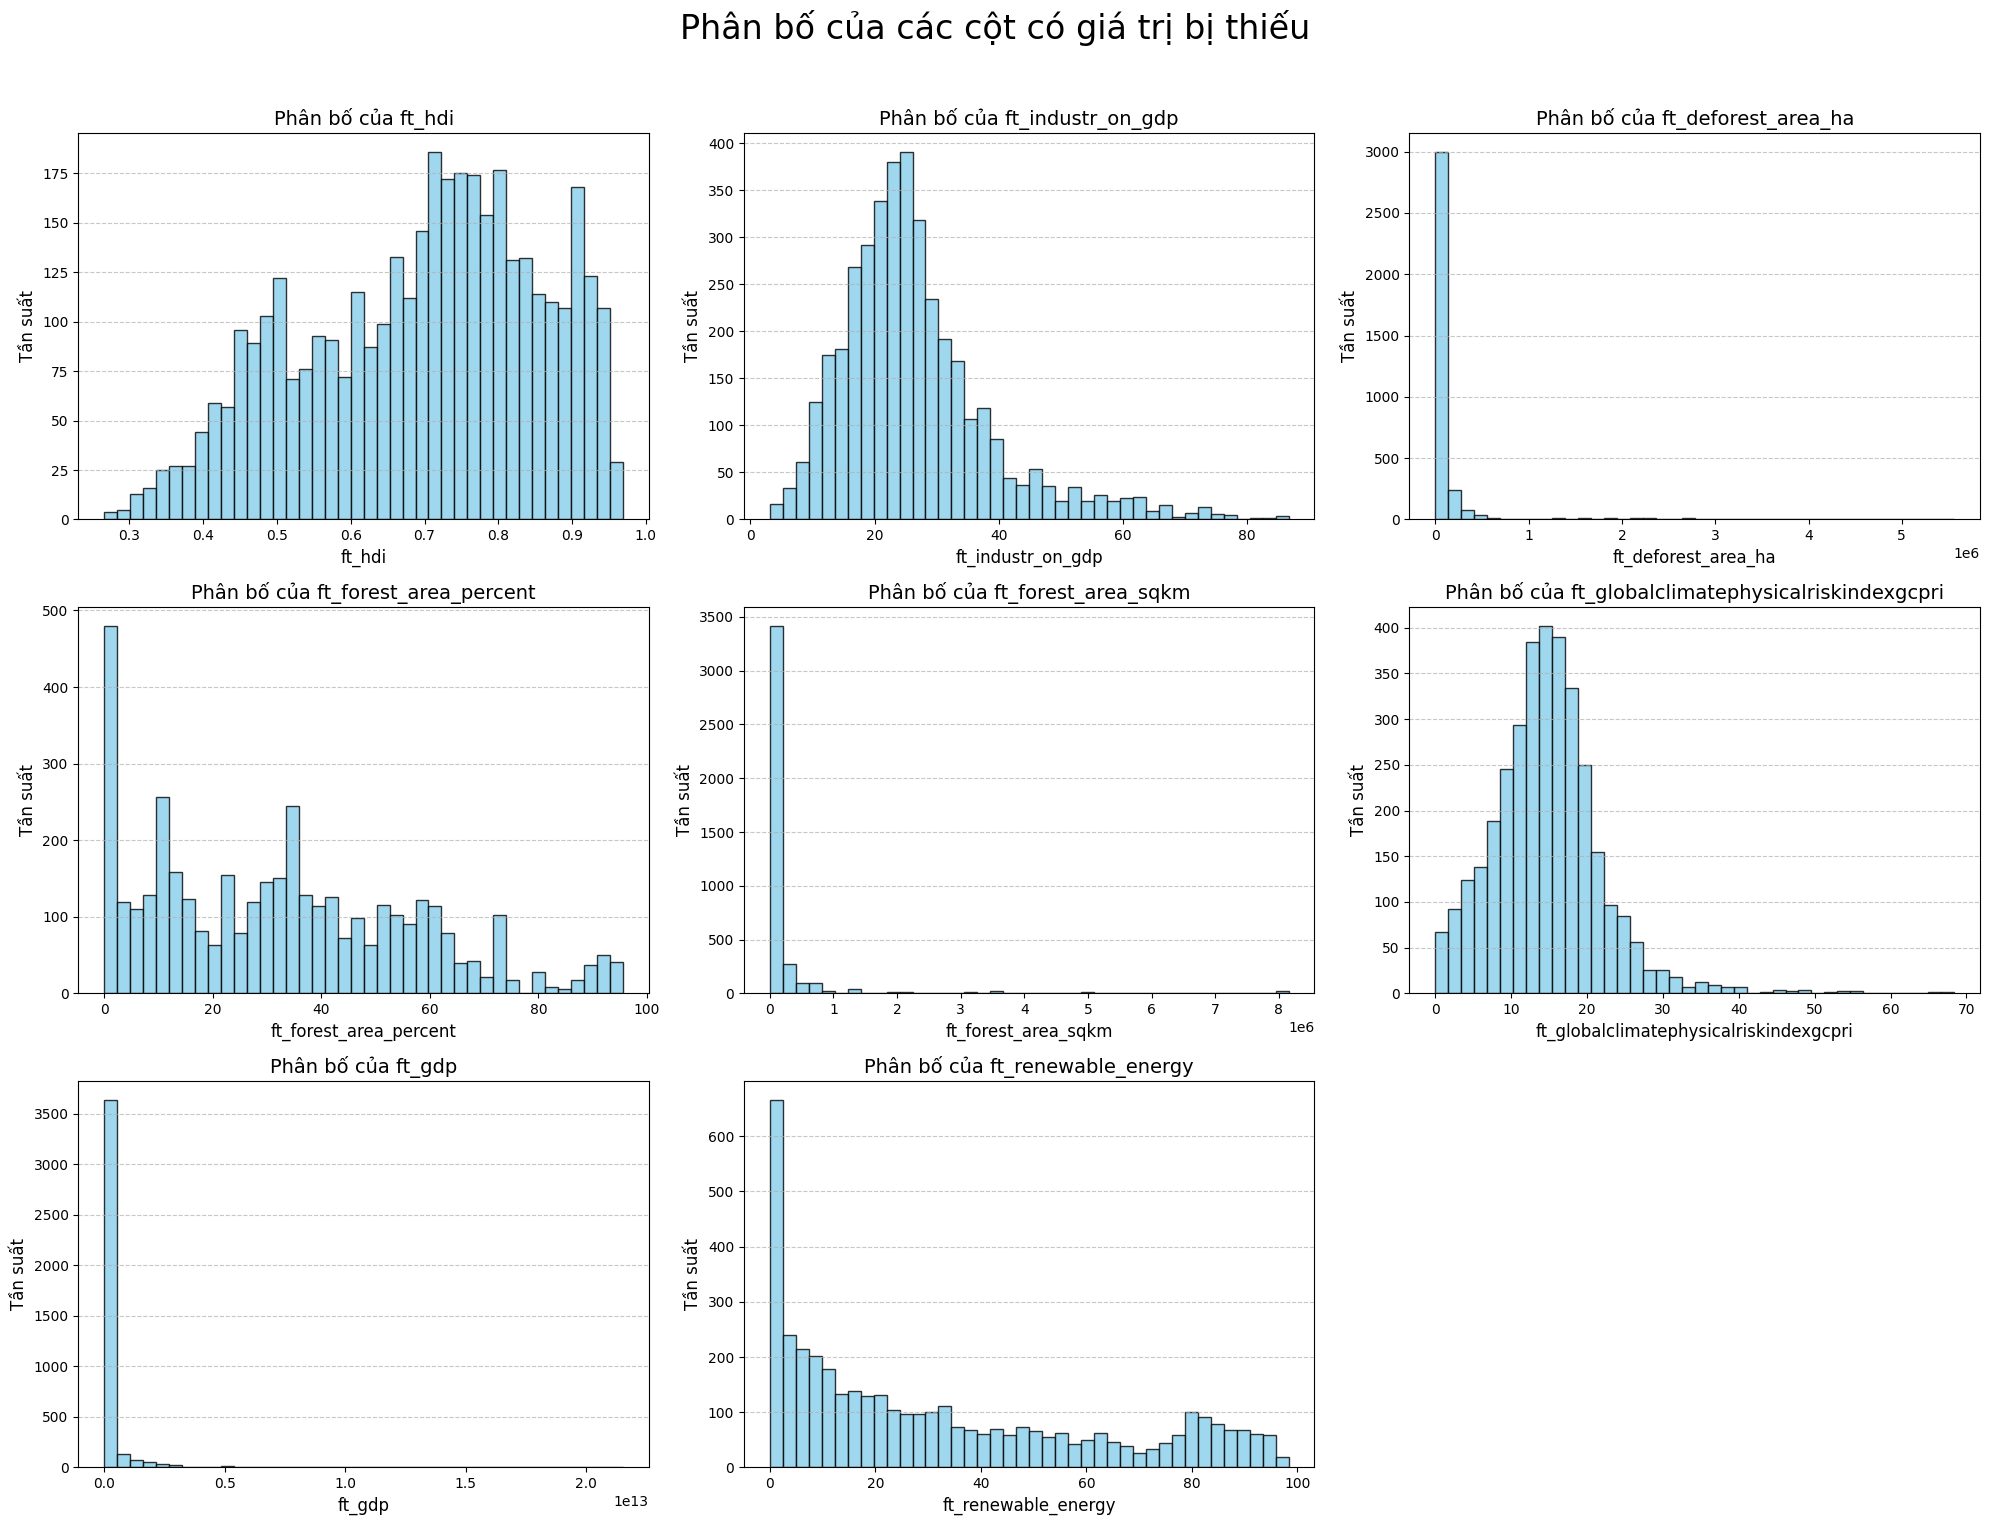

In [87]:
# --- Bắt đầu phần mã vẽ biểu đồ ---

# Xác định các cột có giá trị bị thiếu từ danh sách bạn cung cấp
columns_with_missing = [
    'ft_hdi', 'ft_industr_on_gdp', 'ft_deforest_area_ha',
    'ft_forest_area_percent', 'ft_forest_area_sqkm',
    'ft_globalclimatephysicalriskindexgcpri', 'ft_gdp', 'ft_renewable_energy'
]

# Tạo một lưới biểu đồ 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))
fig.suptitle('Phân bố của các cột có giá trị bị thiếu', fontsize=24)

# Chuyển mảng axes thành dạng phẳng để dễ lặp và vẽ biểu đồ
# `zip` được dùng để duyệt qua từng subplot (ax) và tên cột (col) tương ứng
for ax, col in zip(axes.flatten(), columns_with_missing):
    # Loại bỏ các giá trị thiếu trước khi vẽ
    data_to_plot = df_merged[col].dropna()

    # Vẽ biểu đồ histogram
    ax.hist(data_to_plot, bins=40, color='skyblue', alpha=0.8, edgecolor='black')

    # Đặt tiêu đề và nhãn
    ax.set_title(f'Phân bố của {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Tần suất', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ẩn các subplot không sử dụng (nếu có)
# Vì có 8 cột và lưới 3x3 (9 ô), nên sẽ có 1 ô trống.
for i in range(len(columns_with_missing), len(axes.flatten())):
    axes.flatten()[i].set_visible(False)

# Tự động điều chỉnh bố cục để không bị chồng chéo
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

# Lưu biểu đồ ra file
plt.savefig('distributions_of_missing_columns.png')

# Hiển thị biểu đồ
plt.show()

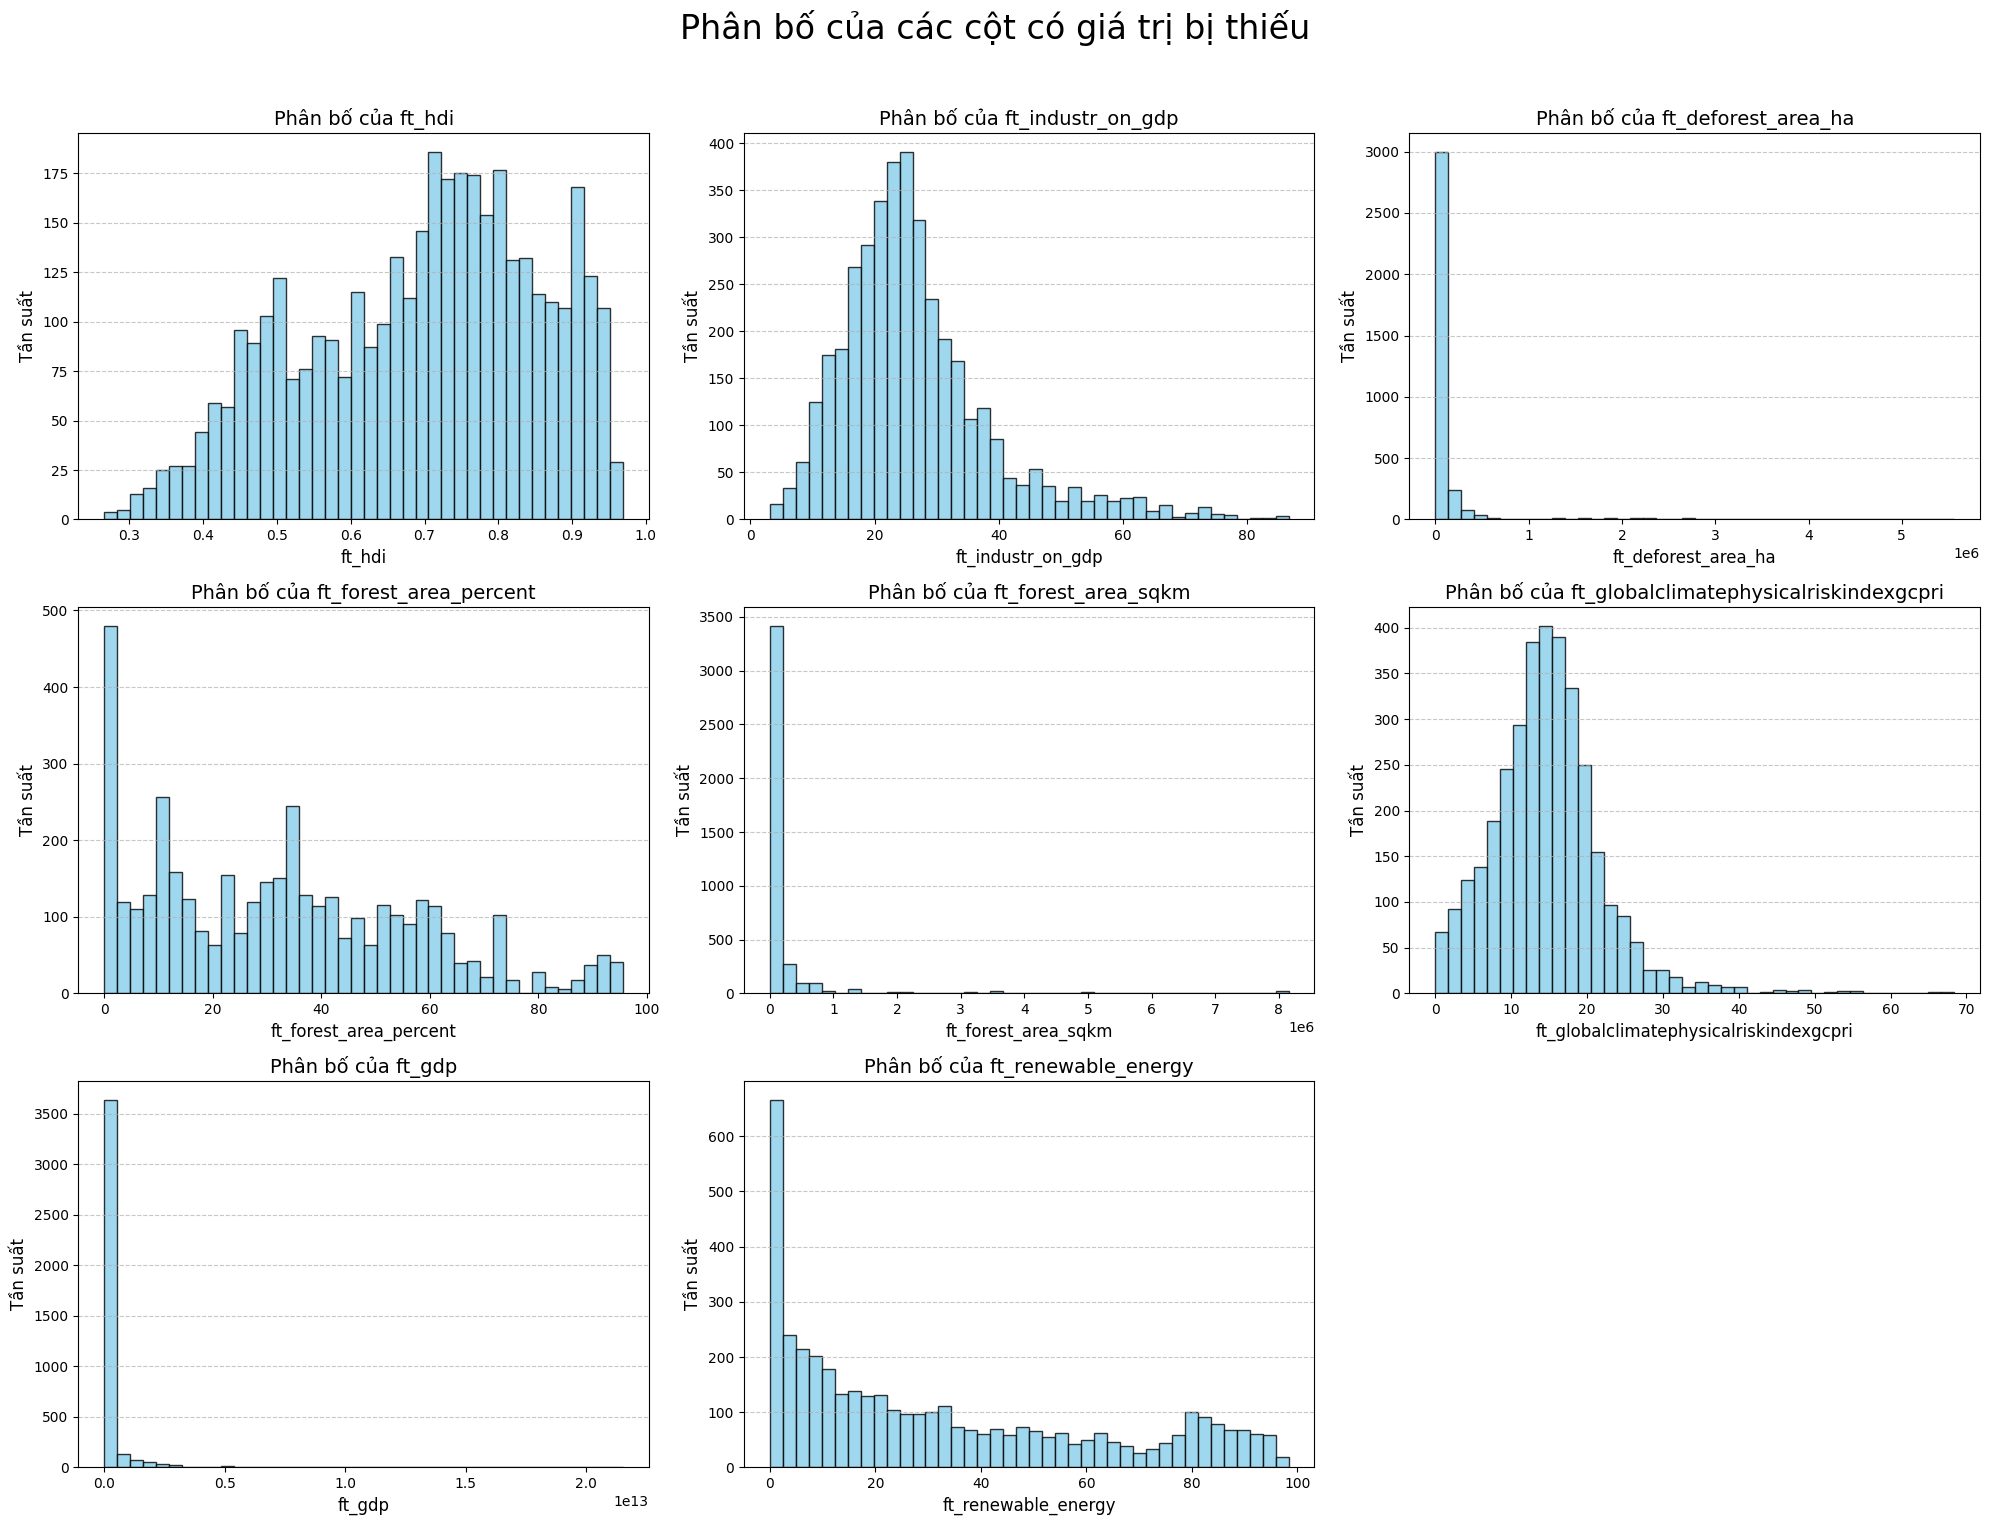

In [89]:
# Áp dụng cho một cột
df_merged['ft_deforest_area_ha_log'] = np.log1p(df_merged['ft_deforest_area_ha'])

# Hoặc áp dụng cho nhiều cột cùng lúc
cols_to_transform = ['ft_deforest_area_ha', 'ft_gdp', 'ft_co2'] # ví dụ
for col in cols_to_transform:
    df_merged[f'{col}_log'] = np.log1p(df_merged[col])

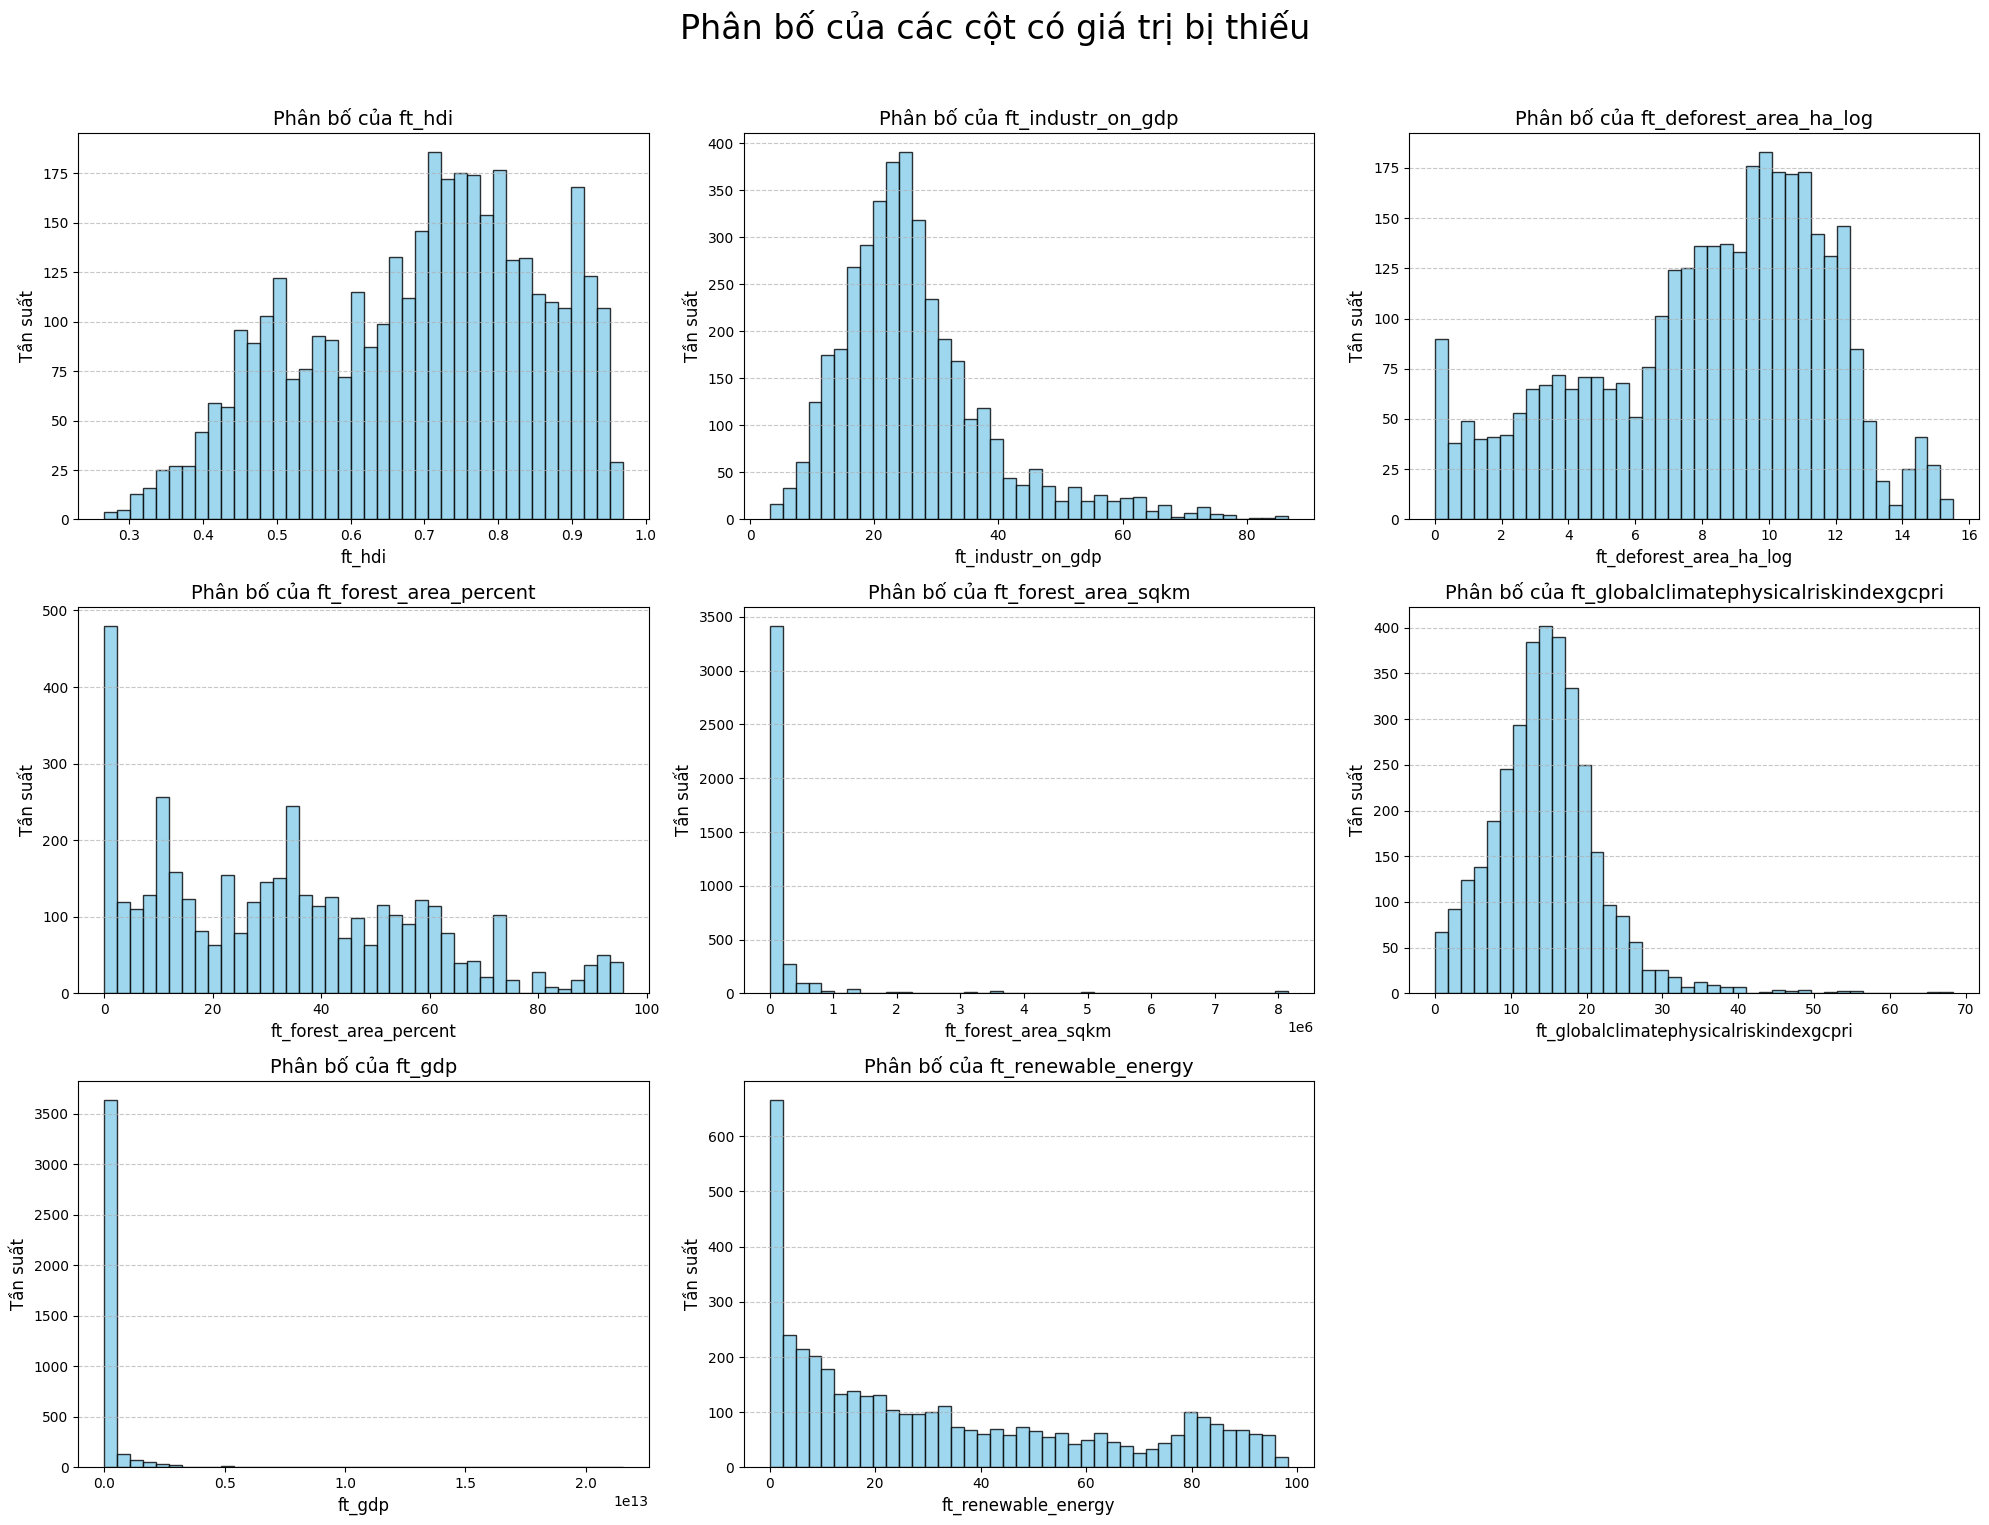

In [91]:
# --- Bắt đầu phần mã vẽ biểu đồ ---

# Xác định các cột có giá trị bị thiếu từ danh sách bạn cung cấp
columns_with_missing = [
    'ft_hdi', 'ft_industr_on_gdp', 'ft_deforest_area_ha_log',
    'ft_forest_area_percent', 'ft_forest_area_sqkm',
    'ft_globalclimatephysicalriskindexgcpri', 'ft_gdp', 'ft_renewable_energy'
]

# Tạo một lưới biểu đồ 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))
fig.suptitle('Phân bố của các cột có giá trị bị thiếu', fontsize=24)

# Chuyển mảng axes thành dạng phẳng để dễ lặp và vẽ biểu đồ
# `zip` được dùng để duyệt qua từng subplot (ax) và tên cột (col) tương ứng
for ax, col in zip(axes.flatten(), columns_with_missing):
    # Loại bỏ các giá trị thiếu trước khi vẽ
    data_to_plot = df_merged[col].dropna()

    # Vẽ biểu đồ histogram
    ax.hist(data_to_plot, bins=40, color='skyblue', alpha=0.8, edgecolor='black')

    # Đặt tiêu đề và nhãn
    ax.set_title(f'Phân bố của {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Tần suất', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ẩn các subplot không sử dụng (nếu có)
# Vì có 8 cột và lưới 3x3 (9 ô), nên sẽ có 1 ô trống.
for i in range(len(columns_with_missing), len(axes.flatten())):
    axes.flatten()[i].set_visible(False)

# Tự động điều chỉnh bố cục để không bị chồng chéo
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

# Lưu biểu đồ ra file
plt.savefig('distributions_of_missing_columns.png')

# Hiển thị biểu đồ
plt.show()